## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Question 1**

In [14]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

**Question 2** Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

<function matplotlib.pyplot.show(close=None, block=None)>

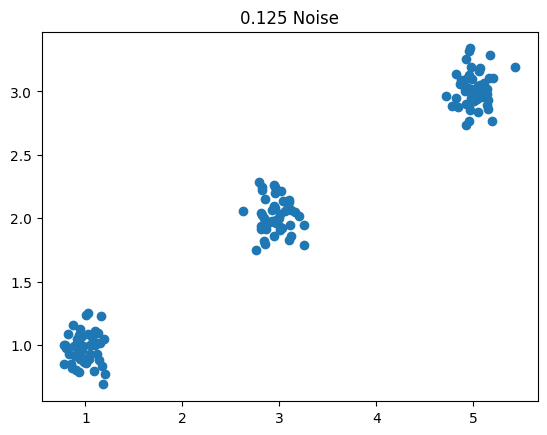

In [15]:
import matplotlib.pyplot as plt
plt.scatter(df0_125['x1'],df0_125['x2'])
plt.title('0.125 Noise')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

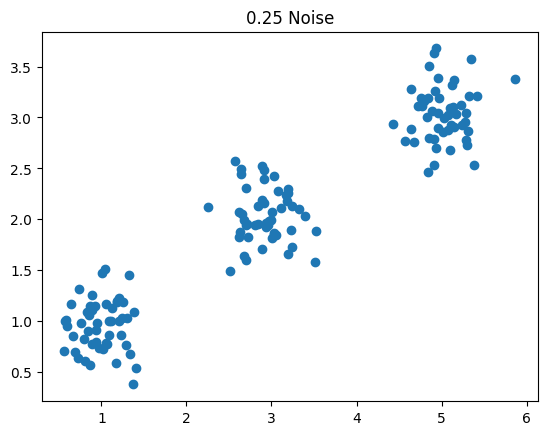

In [16]:
plt.scatter(df0_25['x1'],df0_25['x2'])
plt.title('0.25 Noise')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

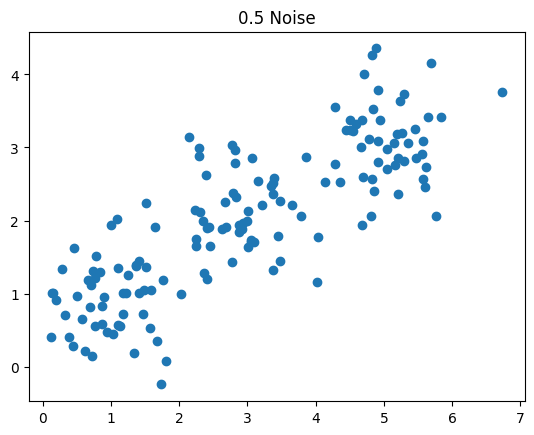

In [17]:
plt.scatter(df0_5['x1'],df0_5['x2'])
plt.title('0.5 Noise')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

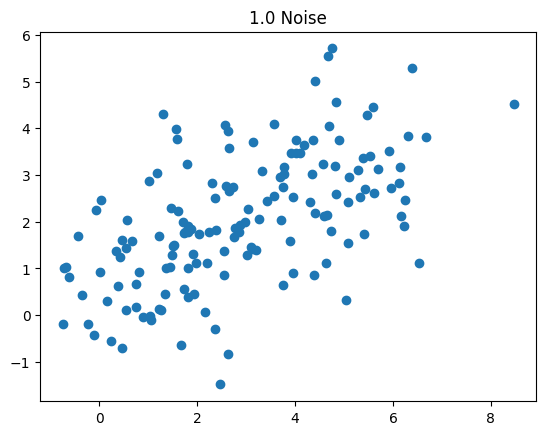

In [18]:
plt.scatter(df1_0['x1'],df1_0['x2'])
plt.title('1.0 Noise')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

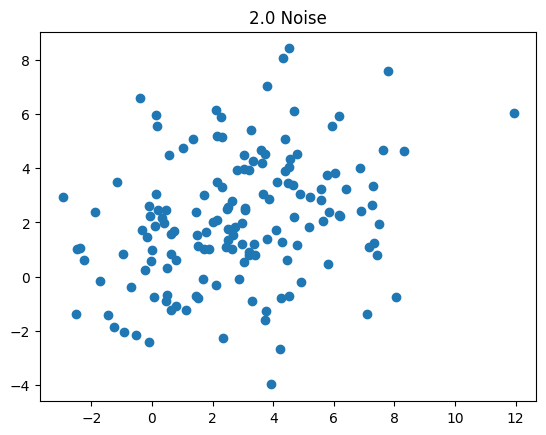

In [19]:
plt.scatter(df2_0['x1'],df2_0['x2'])
plt.title('2.0 Noise')
plt.show

The distictness of the clusters falls off with increasing noise

**Question 3** Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

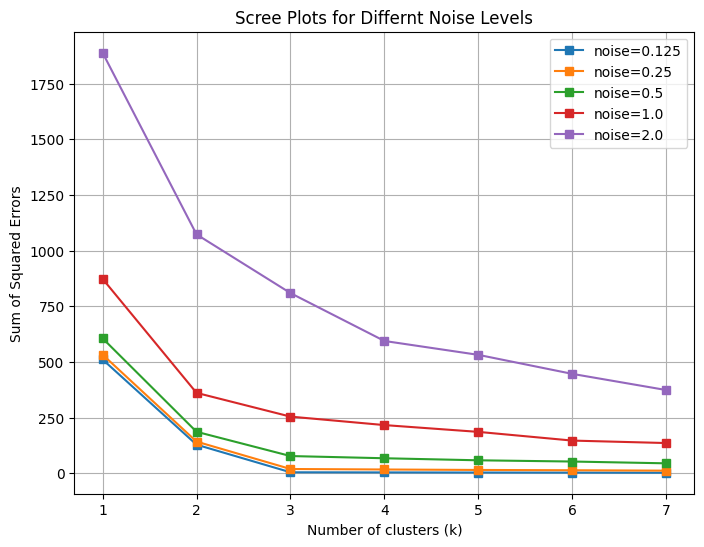

In [20]:
from sklearn.cluster import KMeans

datasets = [
    (df0_125, "noise=0.125"),
    (df0_25,  "noise=0.25"),
    (df0_5,   "noise=0.5"),
    (df1_0,   "noise=1.0"),
    (df2_0,   "noise=2.0")
]

k_values = range(1, 8) # trying k vals 1 through 7

plt.figure(figsize=(8, 6))

for df, noise in datasets: #for each dataset and corresponding label initalize empty sum squared error list
    sse = [] 

    for k in k_values: # performs k means clustering with each k val
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df[["x1", "x2"]]) 
        
        # appends SSE with .inertia_ 
        sse.append(kmeans.inertia_)
    
    # Plots SSE by k val
    plt.plot(k_values, sse, marker='s', label=noise)


plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors")  
plt.title("Scree Plots for Differnt Noise Levels")
plt.legend()
plt.grid(True)
plt.show()


**Question 4** Explain the intuition of the elbow, using this numerical simulation as an example.

In scree plots, the location of the "elbow" gives a method for determining the optimal k value for k means clustering. The elbow is where adding another cluster no longer decreases SSE by a signifigant amount, meaning any additional clusters would result in overfitting. In the above example, 3 looks to be the optimal amount of clusters for all except noise = 2, where 4 looks to be the best.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?

In [23]:
mildata = pd.read_csv('../assignment/data/SIPRI Military Expenditure Database.csv')
mildata.head()

,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
0,0,1988,Afghanistan,NaN,NaN,NaN,NaN
1,1,1989,Afghanistan,NaN,NaN,NaN,NaN
2,2,1990,Afghanistan,NaN,NaN,NaN,NaN
3,3,1991,Afghanistan,NaN,NaN,NaN,NaN
4,4,1992,Afghanistan,NaN,NaN,NaN,NaN


In [24]:
mildata.dropna(inplace=True)
mildata.head()

,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
16,16,2004,Afghanistan,194.554838,0.024313,0.161343,5.059714
17,17,2005,Afghanistan,175.199533,0.019921,0.126898,4.783940
18,18,2006,Afghanistan,177.118535,0.018962,0.103604,4.969025
19,19,2007,Afghanistan,272.650828,0.025663,0.119484,8.102292
20,20,2008,Afghanistan,237.612426,0.023355,0.111654,8.676596


In [25]:
mildata.describe()

,index,Year,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
count,4181.000000,4181.000000,4181.000000,4181.000000,4181.000000,4181.000000
mean,2840.526190,2006.835207,9860.085928,0.022432,0.082151,237.018579
std,1652.493884,8.916002,53738.966493,0.028892,0.144095,406.684043
min,16.000000,1988.000000,0.861989,0.000054,0.000672,0.496066
25%,1410.000000,2000.000000,154.002827,0.011004,0.033415,15.203962
50%,2900.000000,2007.000000,934.311154,0.016293,0.055771,68.976635
75%,4237.000000,2014.000000,4537.007636,0.025682,0.100706,294.217993
max,5881.000000,2021.000000,875941.836165,1.173498,5.816547,6363.553898


Everything else looks to be clean so nothing further is required.

2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?

In [29]:
# max min scaling
mildata['Spending (2020 USD)'] = (mildata['Spending (2020 USD)'] - mildata['Spending (2020 USD)'].min()) / (mildata['Spending (2020 USD)'].max() - mildata['Spending (2020 USD)'].min())
mildata['Spending per Capita'] = (mildata['Spending per Capita'] - mildata['Spending per Capita'].min()) / (mildata['Spending per Capita'].max() - mildata['Spending per Capita'].min())
print(mildata['Spending (2020 USD)'].describe)
print(mildata['Spending per Capita'].describe)

<bound method NDFrame.describe of 16      0.000221
17      0.000199
18      0.000201
19      0.000310
20      0.000270
          ...   
5877    0.000652
5878    0.000728
5879    0.000908
5880    0.000009
5881    0.000038
Name: Spending (2020 USD), Length: 4181, dtype: float64>
<bound method NDFrame.describe of 16      0.000717
17      0.000674
18      0.000703
19      0.001195
20      0.001286
          ...   
5877    0.003681
5878    0.004497
5879    0.005791
5880    0.000013
5881    0.000607
Name: Spending per Capita, Length: 4181, dtype: float64>


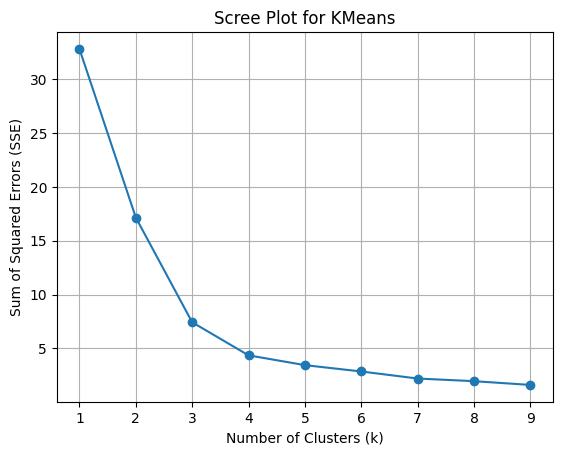

In [32]:
from sklearn.cluster import KMeans

spending = mildata[['Spending (2020 USD)','Spending per Capita']]

sse = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(spending)
    sse.append(kmeans.inertia_)

plt.plot(k_values, sse, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Scree Plot for KMeans")
plt.grid(True)
plt.show()

In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
spending["cluster"] = kmeans.fit_predict(spending)
mildata["cluster"] = spending["cluster"]

/var/folders/xl/310109g14sg2kt37m2ch56h80000gn/T/ipykernel_97742/2771573661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending["cluster"] = kmeans.fit_predict(spending)


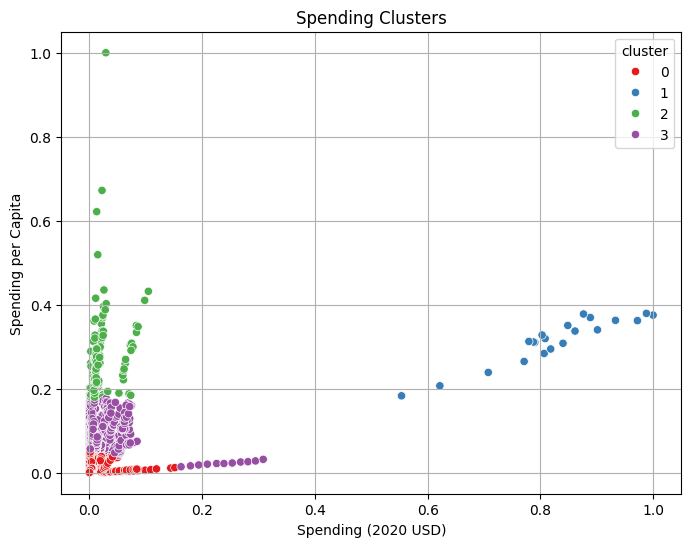

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=spending,
    x="Spending (2020 USD)",
    y="Spending per Capita",
    hue="cluster",
    palette="Set1",
)
plt.title("Spending Clusters")
plt.grid(True)
plt.show()


In [ ]:
mildata['Country'].unique()

In [62]:
us_cluster = mildata[mildata["Country"] == "United States of America"]["cluster"]

# Print the cluster the United States is in
print('The US is in cluster', us_cluster)

The US is in cluster 5521    1
5522    1
5523    1
5524    1
5525    1
5526    1
5527    1
5528    1
5529    1
5530    1
5531    1
5532    1
5533    1
5534    1
5535    1
5536    1
5537    1
5538    1
5539    1
5540    1
5541    1
Name: cluster, dtype: int32


In [64]:
spending.groupby('cluster').describe()


Spending (2020 USD)                                                    \
                      count      mean       std       min       25%       50%   
cluster                                                                         
0                    3184.0  0.002945  0.008887  0.000000  0.000099  0.000419   
1                      21.0  0.826598  0.110154  0.553674  0.787709  0.818333   
2                     154.0  0.018408  0.021504  0.000485  0.006857  0.009988   
3                     822.0  0.021275  0.033058  0.000223  0.003825  0.006941   

                            Spending per Capita                                \
              75%       max               count      mean       std       min   
cluster                                                                         
0        0.002514  0.151384              3184.0  0.010924  0.012609  0.000000   
1        0.888640  1.000000                21.0  0.315099  0.055059  0.183141   
2        0.018726  0.104538               154.0  0.267988  0.097239  0.178464   
3        0.031410  0.308258               822.0  0.088497  0.032662  0.014226   

                                                 
              25%       50%       75%       max  
cluster                                          
0        0.001525  0.005538  0.016190  0.051833  
1        0.294611  0.319386  0.362106  0.379362  
2        0.209158  0.246980  0.293766  1.000000  
3        0.062909  0.081138  0.107008  0.177047

The US is in cluster 1. There are obvious discrepancies in mean spending per capita in different clusters. The groups also have very distinct max values which makes sense because of their positional grouping.

3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?

**b)** Percent of Government Spending

In [65]:
# max min scaling
mildata['Percent of Government Spending'] = (mildata['Percent of Government Spending'] - mildata['Percent of Government Spending'].min()) / (mildata['Percent of Government Spending'].max() - mildata['Percent of Government Spending'].min())
mildata['Percent of GDP'] = (mildata['Percent of GDP'] - mildata['Percent of GDP'].min()) / (mildata['Percent of GDP'].max() - mildata['Percent of GDP'].min())
print(mildata['Percent of Government Spending'].describe)
print(mildata['Percent of GDP'].describe)

<bound method NDFrame.describe of 16      0.027626
17      0.021704
18      0.017698
19      0.020429
20      0.019083
          ...   
5877    0.238127
5878    0.240910
5879    0.302759
5880    0.003141
5881    0.011352
Name: Percent of Government Spending, Length: 4181, dtype: float64>
<bound method NDFrame.describe of 16      0.020673
17      0.016930
18      0.016114
19      0.021824
20      0.019857
          ...   
5877    0.003259
5878    0.002590
5879    0.004512
5880    0.000000
5881    0.000069
Name: Percent of GDP, Length: 4181, dtype: float64>


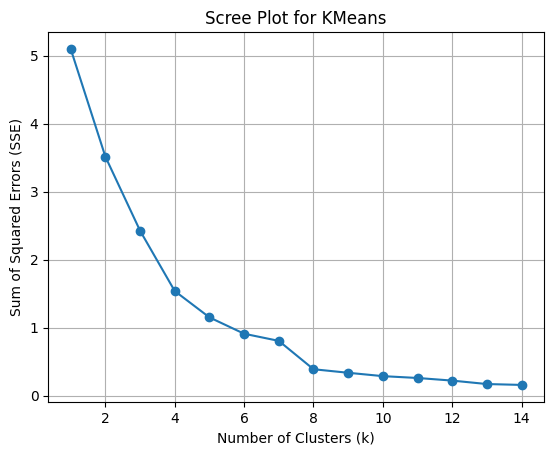

In [69]:
from sklearn.cluster import KMeans

gov = mildata[['Percent of Government Spending','Percent of GDP']]

sse_g = []
k_values_g = range(1, 15)

for k in k_values_g:
    kmeans_g = KMeans(n_clusters=k, random_state=42)
    kmeans_g.fit(gov)
    sse_g.append(kmeans_g.inertia_)

plt.plot(k_values_g, sse_g, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Scree Plot for KMeans")
plt.grid(True)
plt.show()

In [82]:
kmeans_g = KMeans(n_clusters=4, random_state=42)
gov["cluster"] = kmeans.fit_predict(gov)
mildata["cluster"] = gov["cluster"]

/var/folders/xl/310109g14sg2kt37m2ch56h80000gn/T/ipykernel_97742/1837354358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gov["cluster"] = kmeans.fit_predict(gov)


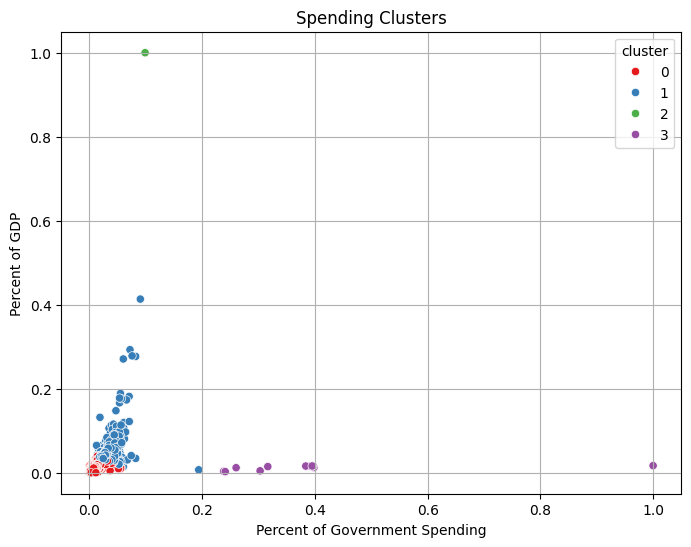

In [83]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=gov,
    x="Percent of Government Spending",
    y="Percent of GDP",
    hue="cluster",
    palette="Set1",
)
plt.title("Spending Clusters")
plt.grid(True)
plt.show()


In [84]:
gov['cluster'].describe()

count    4181.000000
mean        0.125090
std         0.354593
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: cluster, dtype: float64

In [85]:
us_cluster = mildata[mildata["Country"] == "United States of America"]["cluster"]

# Print the cluster the United States is in
print('The US is in cluster', us_cluster)

The US is in cluster 5521    0
5522    0
5523    0
5524    0
5525    0
5526    0
5527    0
5528    1
5529    1
5530    1
5531    1
5532    1
5533    0
5534    0
5535    0
5536    0
5537    0
5538    0
5539    0
5540    0
5541    0
Name: cluster, dtype: int32


In [86]:
spending.groupby('cluster').describe()

Spending (2020 USD)                                                    \
                      count      mean       std       min       25%       50%   
cluster                                                                         
0                    3184.0  0.002945  0.008887  0.000000  0.000099  0.000419   
1                      21.0  0.826598  0.110154  0.553674  0.787709  0.818333   
2                     154.0  0.018408  0.021504  0.000485  0.006857  0.009988   
3                     822.0  0.021275  0.033058  0.000223  0.003825  0.006941   

                            Spending per Capita                                \
              75%       max               count      mean       std       min   
cluster                                                                         
0        0.002514  0.151384              3184.0  0.010924  0.012609  0.000000   
1        0.888640  1.000000                21.0  0.315099  0.055059  0.183141   
2        0.018726  0.104538               154.0  0.267988  0.097239  0.178464   
3        0.031410  0.308258               822.0  0.088497  0.032662  0.014226   

                                                 
              25%       50%       75%       max  
cluster                                          
0        0.001525  0.005538  0.016190  0.051833  
1        0.294611  0.319386  0.362106  0.379362  
2        0.209158  0.246980  0.293766  1.000000  
3        0.062909  0.081138  0.107008  0.177047

Overall the plot looking pretty similar. The primary difference is the cluster the shoots out to the right, towards higher proportion of government spending which is due to there being one country that spends a much higher percent of their money on the military than other countries. This causes it so be a major outlier on the x axis and because the data is max-min normalized it means no other dots on the plot are very far right.

4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 

In [124]:
new_df = k_df[['Spending (2020 USD)', 'Spending per Capita', 'Percent of Government Spending', 'Percent of GDP']]
new_df.head()

,Spending (2020 USD),Spending per Capita,Percent of Government Spending,Percent of GDP
0,0.000221,0.000717,0.027626,0.020673
1,0.000199,0.000674,0.021704,0.016930
2,0.000201,0.000703,0.017698,0.016114
3,0.000310,0.001195,0.020429,0.021824
4,0.000270,0.001286,0.019083,0.019857


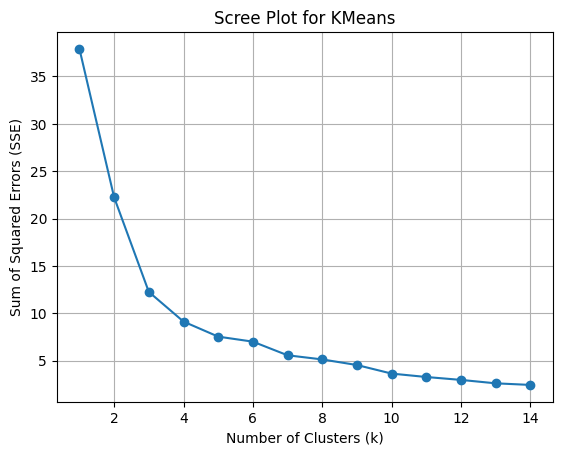

In [127]:

sse_new = []
k_values_new = range(1, 15)

for k in k_values_new:
    kmeans_new = KMeans(n_clusters=k, random_state=42)
    kmeans_new.fit(new_df)
    sse_new.append(kmeans_new.inertia_)

plt.plot(k_values_new, sse_new, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Scree Plot for KMeans")
plt.grid(True)
plt.show()

In [107]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [128]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(new_df)

# 4. Add PCA components to the DataFrame
new_df["PC1"] = reduced_data[:, 0]
new_df["PC2"] = reduced_data[:, 1]

/var/folders/xl/310109g14sg2kt37m2ch56h80000gn/T/ipykernel_97742/3319828700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["PC1"] = reduced_data[:, 0]


/Users/kieranperdue/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


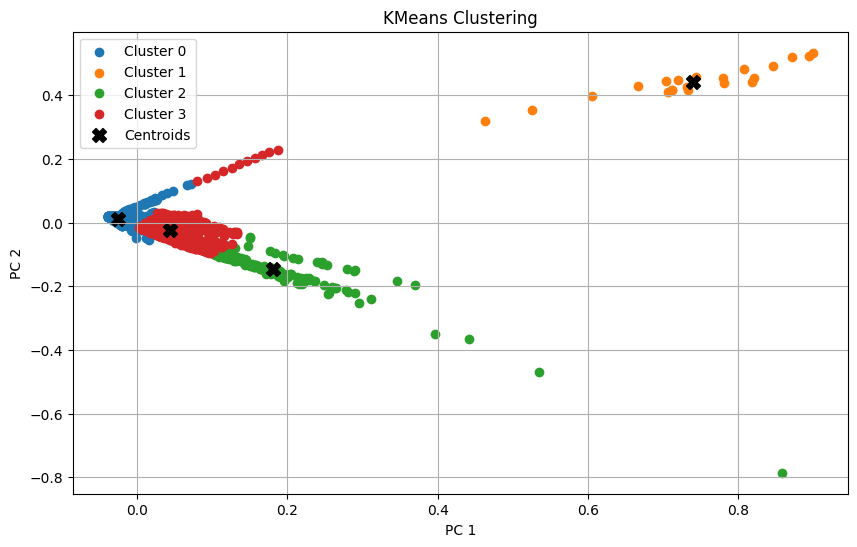

In [ ]:
# 1. Fit KMeans with the chosen number of clusters (e.g., 4)
optimal_k = 4  # adjust based on your scree plot
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(new_df[['Spending (2020 USD)', 'Spending per Capita', 
                                                  'Percent of Government Spending', 'Percent of GDP']])

# 2. Add cluster labels to the DataFrame
new_df['Cluster'] = cluster_labels

# 3. Plot PCA-reduced data with cluster labels
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    clustered = new_df[new_df['Cluster'] == cluster]
    plt.scatter(clustered['PC1'], clustered['PC2'], label=f"Cluster {cluster}")

# Optionally: plot centroids on PCA-reduced space
centroids = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')

# 4. Customize plot
plt.title("KMeans Clustering")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.show()


5. Did the $k$-MC algorithm find any useful patterns for you in analyzing military spending?

Yes this k-means clustering alogrithm was useful for identifying what types of nations had similar spending patterns. Especially because of the inclusions of totals and per capita when using this algorithm, you can see which nations use the budget similarly but are different sized nations. This gives us a way to categorize nations by both what they have available, and how they use what they have as an interesting way to evaluate their military spending.